# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.283485e+01     1.793694e+01
 * time: 0.0037190914154052734
     1     6.225858e+01     9.843309e+00
 * time: 0.011075973510742188
     2     5.599773e+01     1.082099e+01
 * time: 0.028074979782104492
     3     3.964089e+01     9.599976e+00
 * time: 0.04967093467712402
     4     2.778659e+01     7.927302e+00
 * time: 0.06984400749206543
     5     1.769052e+01     4.669587e+00
 * time: 0.08678698539733887
     6     1.157356e+01     3.315036e+00
 * time: 0.16774201393127441
     7     1.043409e+01     6.749104e+00
 * time: 0.1811840534210205
     8     8.971863e+00     2.775317e+00
 * time: 0.19763994216918945
     9     8.030141e+00     1.996252e+00
 * time: 0.21252989768981934
    10     7.732317e+00     1.762229e+00
 * time: 0.22423005104064941
    11     7.340705e+00     1.536177e+00
 * time: 0.23604106903076172
    12     6.991741e+00     1.171128e+00
 * time: 0.24764394760131836
    13     6.635873e+00     1.450397e+00
 * ti

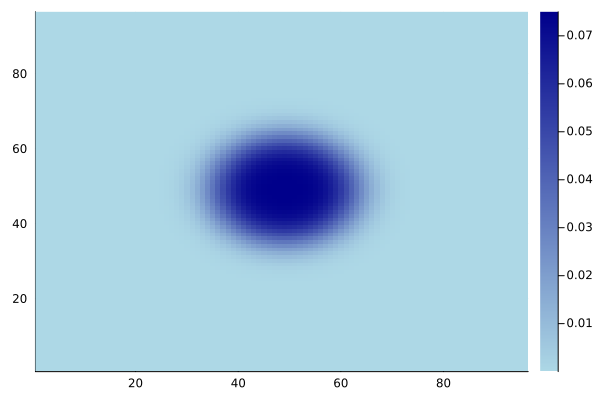

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)